# Analysis Varioscan results

- Author: Jurre Hageman
- Date: 2020-02-13
- Version: 2021-02-16

## User Settings

In [1]:
# Folder & File settings:
# Filetype is utf8 csv from Excel export
folder = 'sample_data'
file_name = '2020-01-30.csv'

# Experiment settings:
organism = 'My Organism'
conc_start = 2.0
conc_end = 0
tubes = 8
tube_names = "A,B,C,D,E,F,G,H" # For user convenience, type a string (data comma-seperated)
fold_dillution = 2
accuracy = 3 #number of digits
sample = 'Sample1,Sample2,Elution' # For user convenience, type a string (data comma-seperated)


# Visualization settings
linecolors = "#FF3633,#FF8933,#FCFF33,#62FF33,#33FFEB,#33A7FF,#5F33FF,#EA33FF"
headers = 'time (min),sample,replicate,conc (%),OD S,OD B'

## Imports

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import os

## Transform user settings

In [3]:
# manipulate user data
if type(tube_names) == str:
    tube_names = tube_names.split(',')
if type(sample) == str:
    sample = sample.split(',')
if type(linecolors) == str:
    linecolors = linecolors.split(',')
if type(headers) == str:
    headers = headers.split(',')

# pretty print the dataframe
def pprint_df(df):
    print(df.to_string())


def generate_dill_series(conc_start, conc_end, fold_dillution, tubes, accuracy):
    dillution_series = {}
    num = conc_start
    for i in range(tubes - 1):  
        dillution_series[tube_names[i]] = round(num, accuracy)
        num /= fold_dillution
    dillution_series[tube_names[i + 1]] = round(conc_end, accuracy)
    return dillution_series

concentrations =  generate_dill_series(conc_start, conc_end, fold_dillution, tubes, accuracy)

colors_tubeletters = dict(zip(tube_names, linecolors))
colors = {concentrations[i]:j for (i, j) in colors_tubeletters.items()}

## Read the data

In [4]:
def read_data(folder, file_name):
    file_path = os.path.join(folder, file_name)
    with open(file_path) as f:
        time = 0
        matrix = []
        row = None
        for line in (f):
            line = line.strip().split(';')
            if line[0] == "Value":
                row = 0
                time += 10
            if row != None and row > 0 and row < 9:
                row_letter = line[0]
                nums = line[1:13]
                nums = [float(i.replace(',', '.')) for i in nums]
                for i in range(3):
                    replicate = i + 1
                    sample1 = [time - 10, sample[0], replicate, concentrations[row_letter], nums[i], nums[3]]
                    sample2 = [time - 10, sample[1], replicate, concentrations[row_letter], nums[i + 4], nums[7]]
                    sample3 = [time - 10, sample[2], replicate, concentrations[row_letter], nums[i + 8], nums[11]]
                    matrix.append(sample1)
                    matrix.append(sample2)
                    matrix.append(sample3)
            if row != None:
                row += 1
        df = pd.DataFrame.from_records(matrix)
        df.columns = headers
        return df
            
            

df = read_data(folder, file_name)
#print(df.head())

## Calulations on data

In [5]:
# Substract the Blanc
df['OD corr'] = df['OD S'] - df['OD B']
#print(df.head())

## Categorize the data

In [6]:
# select samples:
sample1 = df.loc[df['sample'] == sample[0]]
sample2 = df.loc[df['sample'] == sample[1]]
sample3 = df.loc[df['sample'] == sample[2]]

title_sample1 = "{} ({}) file: {}".format(sample[0], organism, file_name)
title_sample2 = "{} ({}) file: {}".format(sample[1], organism, file_name)
title_sample3 = "{} ({}) file: {}".format(sample[2], organism, file_name)

## Plotting the data: Line plot with translucent error bands

Text(0.5, 1.0, 'Elution (My Organism) file: 2020-01-30.csv')

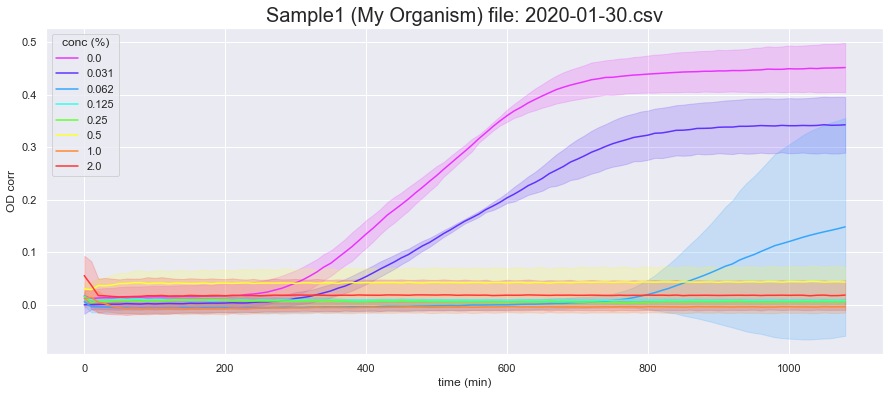

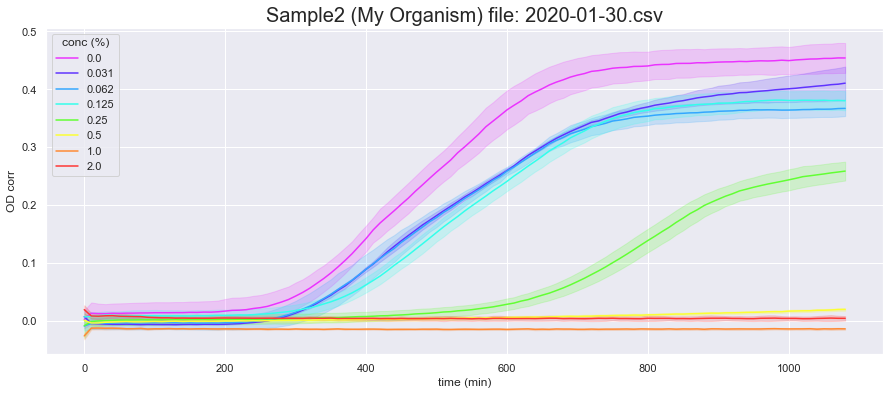

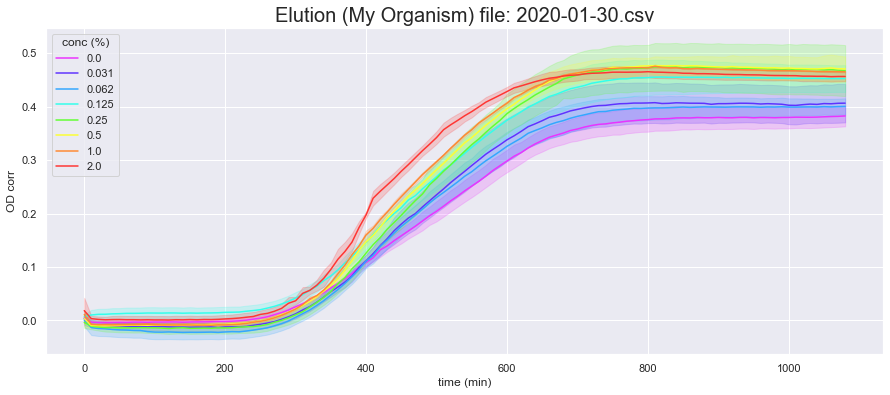

In [7]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD corr', ci='sd', hue='conc (%)', palette=colors)
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD corr', ci='sd', hue='conc (%)', palette=colors)
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD corr', ci='sd', hue='conc (%)', palette=colors)
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: Line plot with discrete error bars

Text(0.5, 1.0, 'Elution (My Organism) file: 2020-01-30.csv')

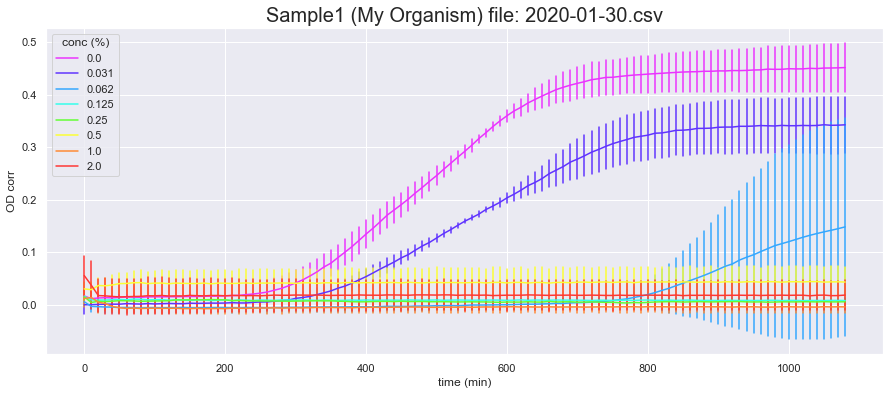

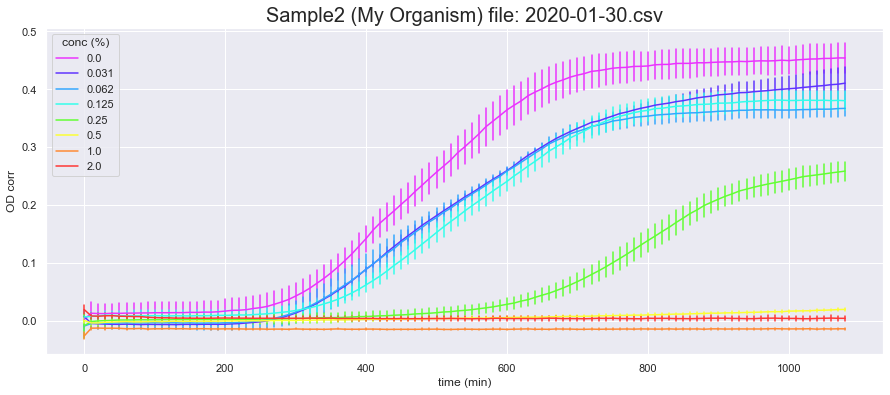

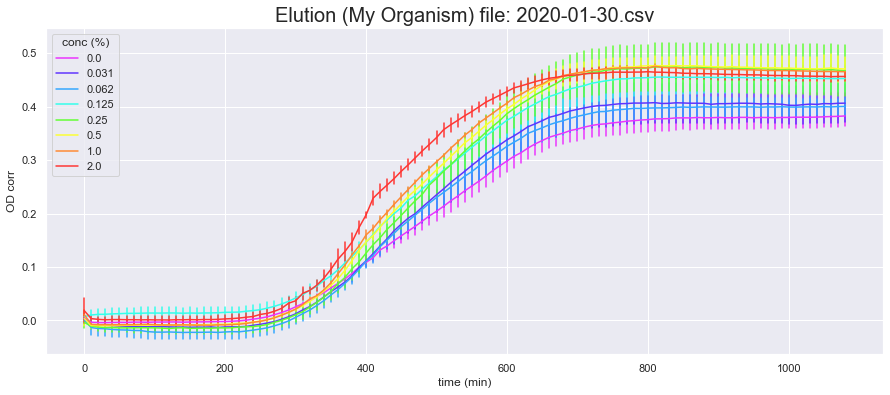

In [8]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD corr', ci='sd', err_style='bars', hue='conc (%)', palette=colors)
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD corr', ci='sd', err_style='bars', hue='conc (%)', palette=colors)
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD corr', ci='sd', err_style='bars', hue='conc (%)', palette=colors)
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: Lineplot with markers and discrete error bars

Text(0.5, 1.0, 'Elution (My Organism) file: 2020-01-30.csv')

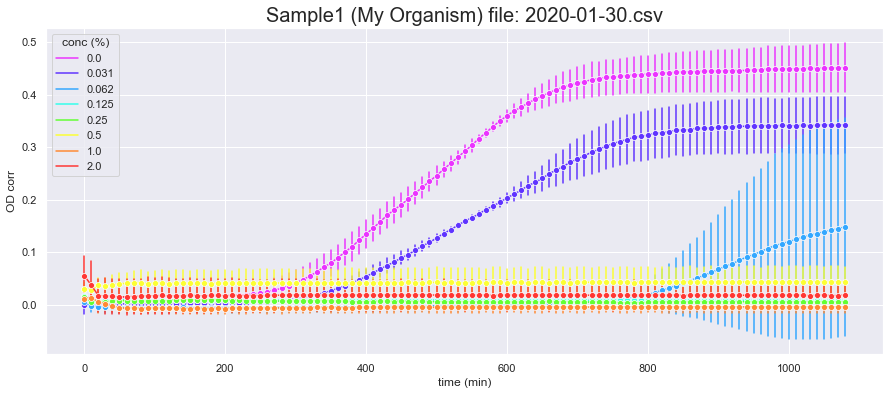

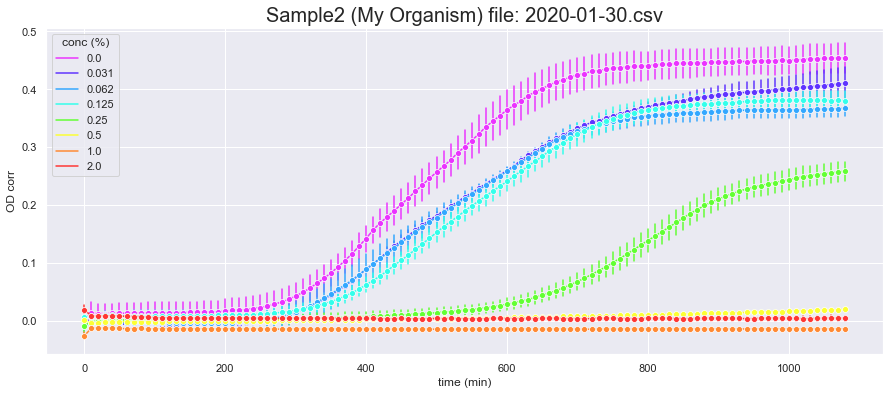

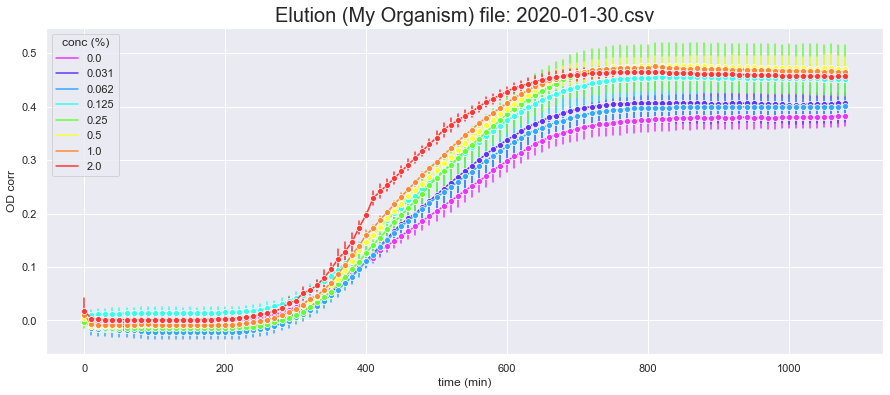

In [9]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD corr', ci='sd', err_style='bars', hue='conc (%)', palette=colors, marker='o')
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD corr', ci='sd', err_style='bars', hue='conc (%)', palette=colors, marker='o')
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD corr', ci='sd', err_style='bars', hue='conc (%)', palette=colors, marker='o')
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: scatter

Text(0.5, 1.0, 'Elution (My Organism) file: 2020-01-30.csv')

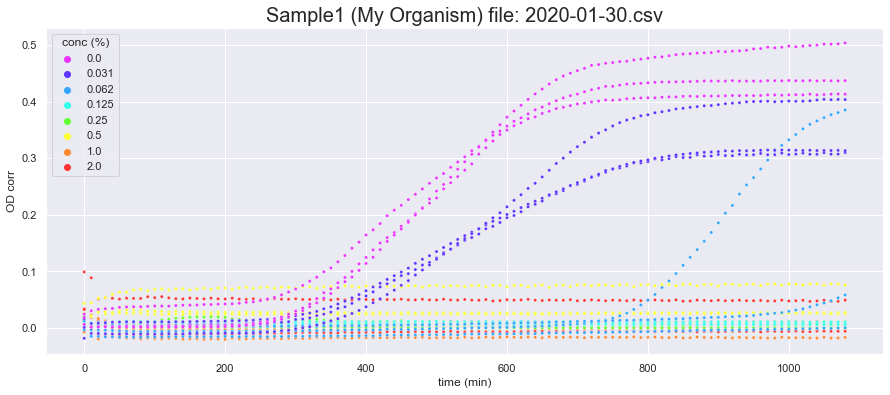

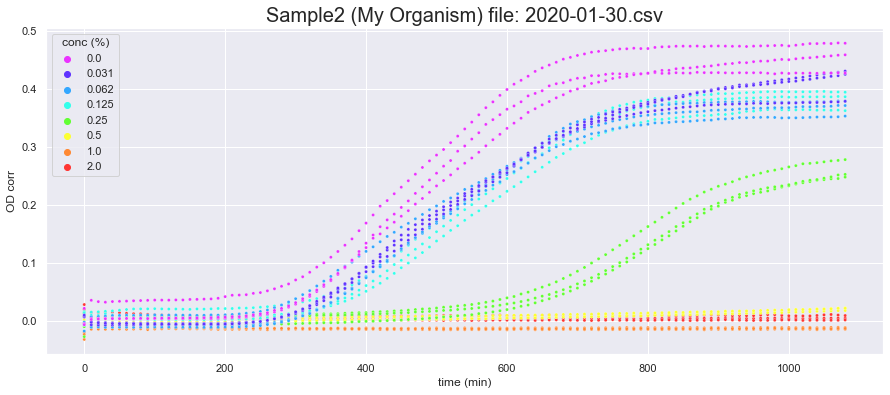

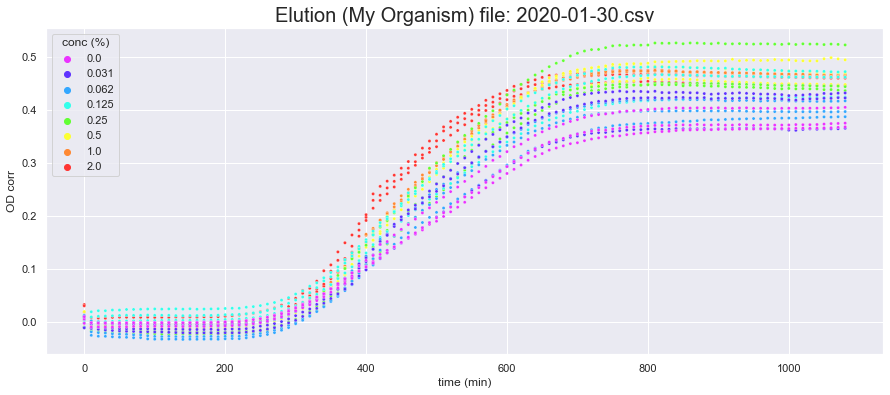

In [10]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="time (min)", y="OD corr", hue="conc (%)", data=sample1, palette=colors, s=10)
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="time (min)", y="OD corr", hue="conc (%)", data=sample2, palette=colors, s=10)
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="time (min)", y="OD corr", hue="conc (%)", data=sample3, palette=colors, s=10)
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: Controls

[(0.0, 0.5)]

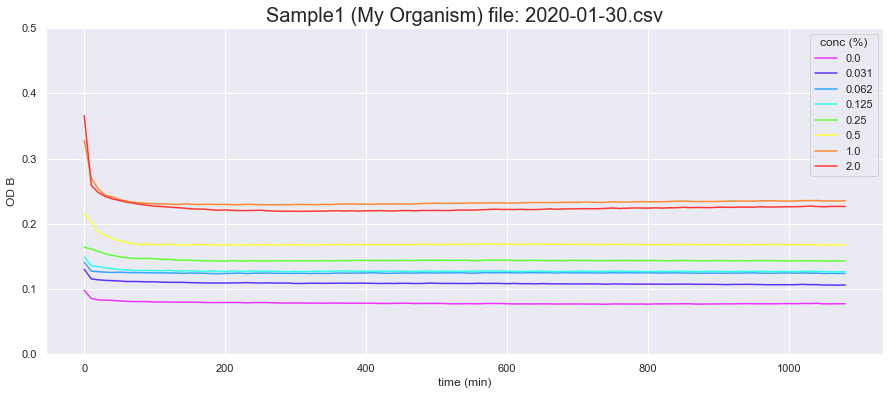

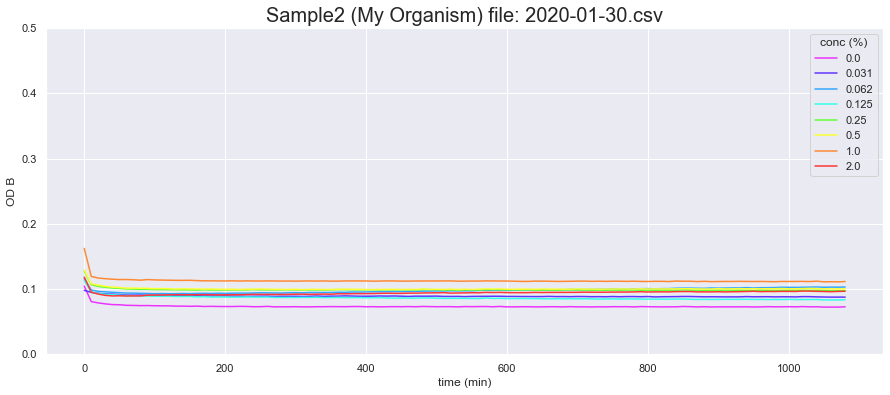

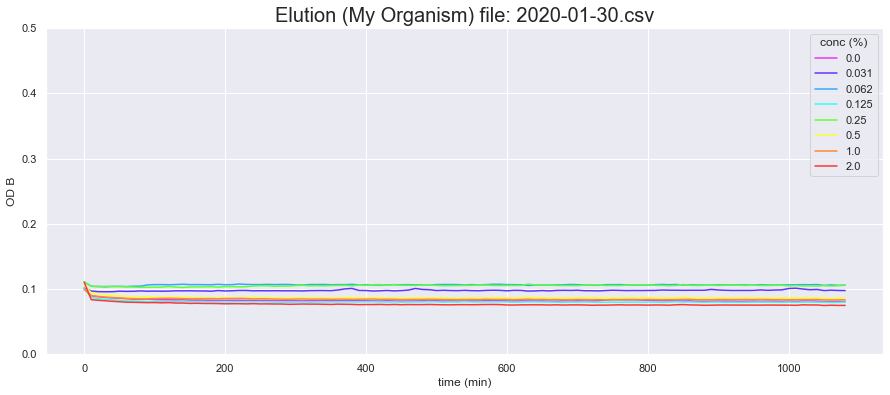

In [11]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD B', ci=None, hue='conc (%)', palette=colors)
ax.set_title(title_sample1, fontsize=20)
ax.set(ylim=(0, 0.5))

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD B', ci=None, hue='conc (%)', palette=colors)
ax.set_title(title_sample2, fontsize=20)
ax.set(ylim=(0, 0.5))

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD B', ci=None, hue='conc (%)', palette=colors)
ax.set_title(title_sample3, fontsize=20)
ax.set(ylim=(0, 0.5))